# Luise Hauptmann

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
data=df
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# shows the number of rows and columns in the data. 
df.shape

(1898, 9)

#### Observations: 

* The data has 1898 rows and 9 columns. 


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 

* order_id, customer_id, food_preparation_time, and delivery_time are all integers. 
* restaurant_name, cuisine_type, day_of_the_week, and rating are all objects, which is synonomous for strings. 
* cost_of_the_order is a float data type, which is a number with a decimal. 
* Not given is present in the ratings column, so it will be dealt with later, so as to have the ratings column as a float instead of a string. 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [6]:
df.duplicated().sum()

0

#### Observations:
* There are no missing values in the data set. 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
df.describe().T
# this method shows the statistical summary of all numerical components in the data set.
# this is useful when looking at the data as a whole, but one can also separate the data based on variable as shown below.
# the .T at the end of the code transposes the data to make it easier to read. 

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [8]:
# Write your code here
# The following code separates the statistics based on the variable. 

#minimum time. the print function is used to display all information as opposed to only the last value read by python.
minimum_prep_time=round(df['food_preparation_time'].min(),2)
print('The minimum time for food to be prepared is', minimum_prep_time, 'minutes.')

# average time
mean_prep_time=round(df['food_preparation_time'].mean(),2)
print('The average time for food to be prepared is',mean_prep_time ,'minutes.')

# maximum time
max_prep_time=round(df['food_preparation_time'].max(),2)
print('The maximum time for food to be prepared is', max_prep_time , 'minutes.')

The minimum time for food to be prepared is 20 minutes.
The average time for food to be prepared is 27.37 minutes.
The maximum time for food to be prepared is 35 minutes.


#### Observations:

* Minimum time: 20 minutes.
* Average time: about 27.37 minutes.
* Maximum time: 35 minutes. 

### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

In [10]:
# groupby function is used to split the data into criteria.
# here is is being used to show how many orders were not rated.
df.groupby(['rating']).count()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,food_preparation_time,delivery_time
rating,,,,,,,,
3,188,188,188,188,188,188,188,188
4,386,386,386,386,386,386,386,386
5,588,588,588,588,588,588,588,588
Not given,736,736,736,736,736,736,736,736


#### Observations: 736 orders are not rated. 


In [11]:
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [12]:
# order_id
# show order ID.
df['order_id'].value_counts().reset_index()

,index,order_id
0,1477147,1
1,1477697,1
2,1477555,1
3,1478028,1
4,1478308,1
...,...,...
1893,1478087,1
1894,1476775,1
1895,1478421,1
1896,1476774,1


Order ID shows no distribution or correlation. 

In [13]:
# customer_id
df['customer_id'].value_counts().reset_index()
# show customer_id
# several customers have ordered many times. 

,index,customer_id
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7
...,...,...
1195,385426,1
1196,254913,1
1197,289597,1
1198,74412,1


Several customers have ordered more than once. 

In [14]:
# restaurant_name
df['restaurant_name'].value_counts().reset_index()
# recall restaurant name and show how many orders per restaurant. 

,index,restaurant_name
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
...,...,...
173,Sushi Choshi,1
174,Dos Caminos Soho,1
175,La Follia,1
176,Philippe Chow,1


Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the most popular restaurants. 

Other restaurants such as wichcraft, Philippe Chow, La follia, and Sushi Choshi have only had one order. 

#### Cuisine Type

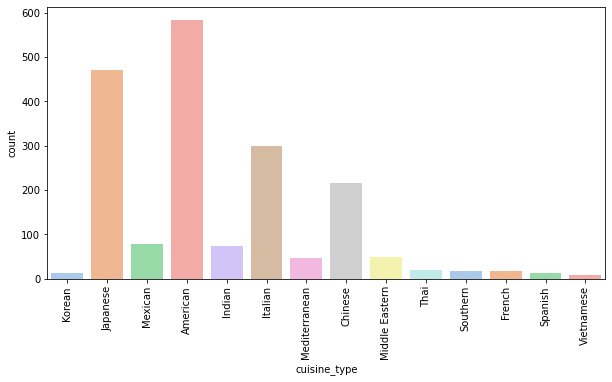

In [15]:
# cuisine_type
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'cuisine_type',palette='pastel');
plt.xticks(rotation=90) #rotates x axis labels
plt.show() #shows the graph without array from above code.

**Observations:**
* American restaurants are the most popular, followed by Japanese, Italian, and Chinese cuisine respectively. 

#### Cost of the Order

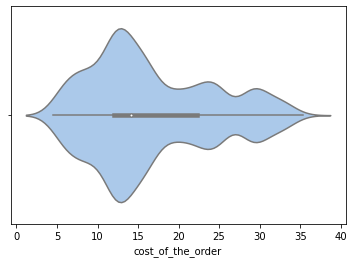

In [16]:
# cost_of_the_order
sns.violinplot(data=df, x='cost_of_the_order',palette='pastel');

**Observations:**
* The median cost of the order is between 10 and 15 dollars. 
* The order cost ranges between approximately 5 and 40 dollars. 
* The distribution of the order cost is skewed towards the right. 

#### Day of the Week

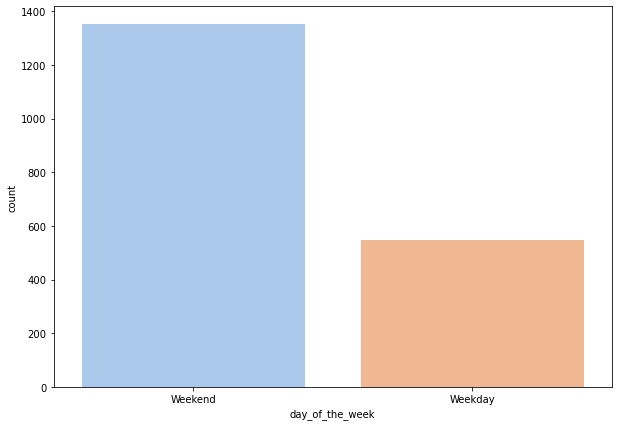

In [17]:
# day_of_the_week
plt.figure(figsize=(10,7))
sns.countplot(data=df, x= 'day_of_the_week',palette='pastel');

**Observations:**
* Weekends are significantly more popular, with over twice as many orders as weekdays.
* Day of the week is skewed towards weekends- with a majority of the orders being placed on the weekend. 

#### Rating

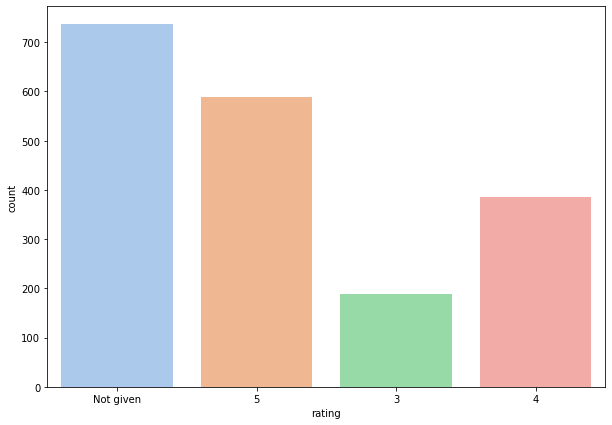

In [18]:
# rating
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='rating', palette='pastel');

**Observations:**
* Not given is the most popular rating in the rating variable with over 700 responses. 5/5 is the next popular with approximately 570 responses, followed by 4/5 and 3/5 which have nearly 400 and 200 responses respectively. 
* The distribution of this plot is skewed towards the Not given response. 

#### Food Preparation Time

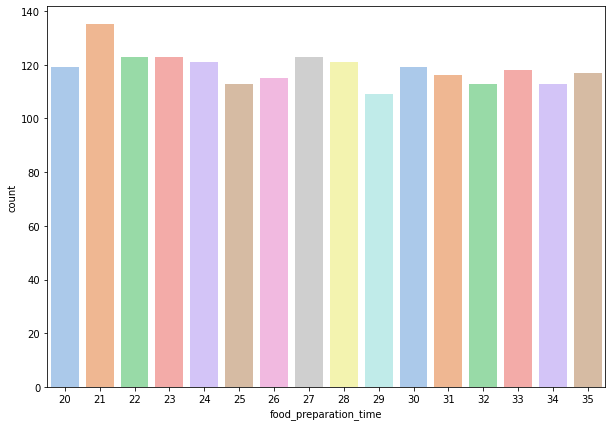

In [19]:
# food_preparation_time
plt.figure(figsize=(10,7)) #resizes figure
sns.countplot(data=df, x='food_preparation_time', palette='pastel');

<AxesSubplot:xlabel='Food preparation time (in minutes)', ylabel='Density'>

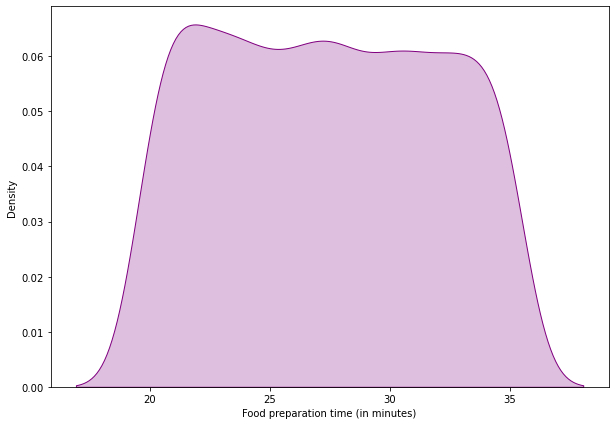

In [20]:
plt.figure(figsize=(10,7)) #resizes figure
plt.xlabel('Food preparation time (in minutes)') #labels x axis
plt.ylabel('Density') # labels y axis
sns.kdeplot(df['food_preparation_time'],shade='True', color='purple')

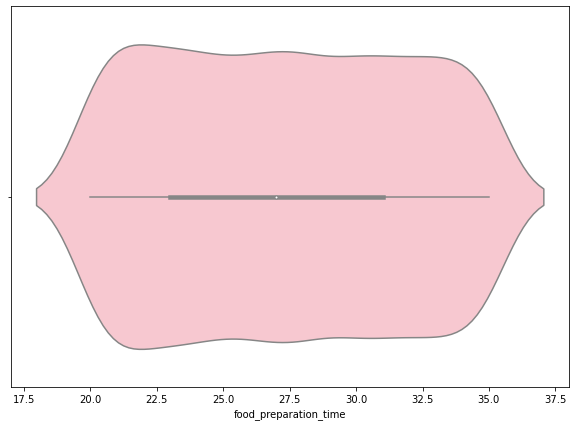

In [21]:
plt.figure(figsize=(10,7)) #resizes figure
sns.violinplot(data=df, x='food_preparation_time',color='pink');

**Observations:** 
* The median value of food preparation time is approximately 27 minutes. 
* There are several bumps in the data that show high distribution; namely at 20, 25, 30, and 34 minutes. 
* The distribution of the variable food_preparation_time is relatively normal. 

#### Delivery Time

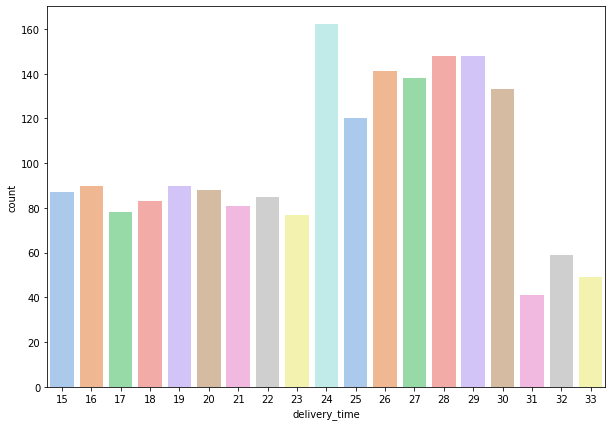

In [22]:
# delivery_time
plt.figure(figsize=(10,7)) #resizes figure
sns.countplot(data=df, x='delivery_time', palette='pastel');

**Observations:** 
* The delivery time peaks betwen 27.5 and 29 minutes. 
* The distribution of delivery time is skewed slightly to the left, with outliers on both sides effecting the data distribution. 


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [23]:
df['restaurant_name'].value_counts().head(5).reset_index()
# value counts sorts by how many times a value shows up in a data frame
# .head(5) instructs python to return the first 5 entries in the data set

,index,restaurant_name
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
* Shake Shack has 219 orders
* The Meatball Shop has 132 orders
* Blue Ribbon Sushi has 119 orders
* Blue Ribbon Fried Chicken has 96 orders
* Parm has 68 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [24]:
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().reset_index()

,index,cuisine_type
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53
5,Indian,49
6,Mediterranean,32
7,Middle Eastern,32
8,Thai,15
9,French,13


#### Observations:
* The most popular cuisine type on weekends is American cuisine, with 415 orders.
* Japanese cuisine has 335 orders on the weekend.
* Italian, Chinese, and Mexican cuisine round out the top 5 with 207, 163, and 53 orders respectively. 

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
# return the number of orders that cost over $20
over_20=df.loc[(df['cost_of_the_order']>20)]['cost_of_the_order']
more_than_20=over_20.count()
print(more_than_20, 'orders cost more than $20')

# divide over_20 by the total number of orders. 
#Multiply by 100 to get a percentage, and round to two decimal places. 
order_percentage=round(over_20.count()/1898*100,2)

print('Approximately',order_percentage,'% of orders cost more than $20.')

555 orders cost more than $20
Approximately 29.24 % of orders cost more than $20.


#### Observations: 
* 29.24% of orders cost over $20



### **Question 10**: What is the mean order delivery time? [1 mark]

In [26]:
# Write the code here
average_delivery_time= round(df['delivery_time'].mean(),2)
print('The average order delivery time is', average_delivery_time, 'minutes')
#df[].mean() function is used to find the average of the input data. 

The average order delivery time is 24.16 minutes


#### Observations:
The average order delivery time is 24.16 minutes. 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
# Write the code here
df['customer_id'].value_counts().head(3)
# sort by customer_id and return the top 3 most frequent customers. 

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
* customer 52832 had 13 orders.
* customer 47440 had 10 orders. 
* customer 83287 had 9 orders. 

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Correlation of numerical variables

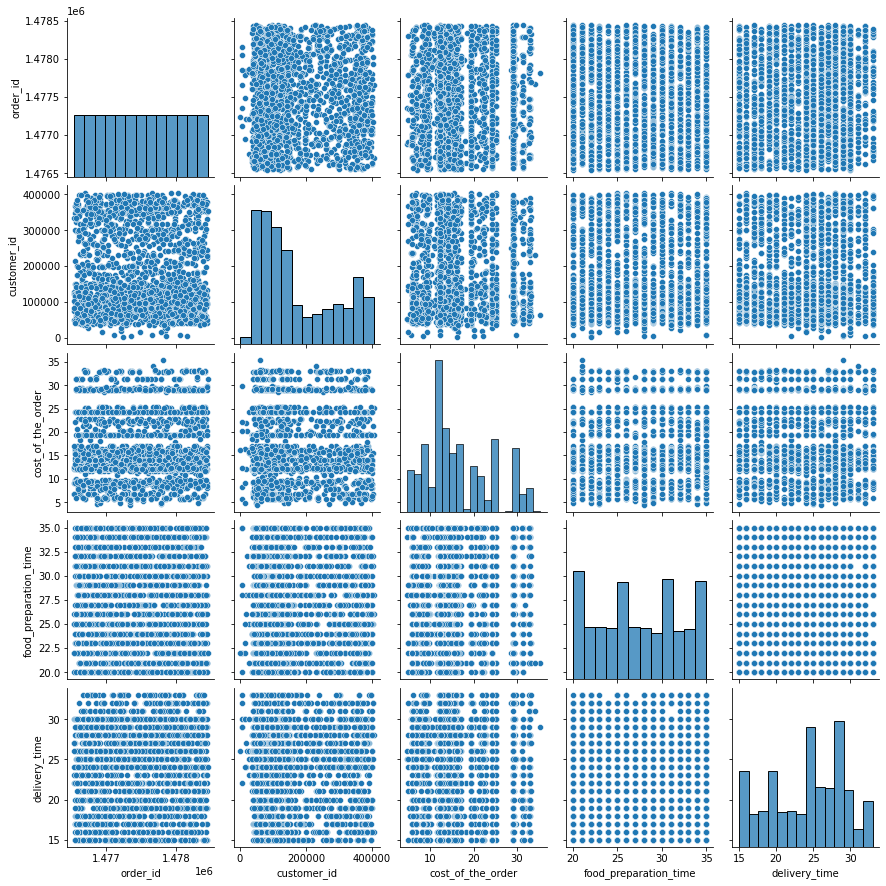

In [28]:
# visualization utilizing a pairplot
sns.pairplot(df);

In [29]:
# correlation utilizing a matrix
correlation = df.corr() 
correlation

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


Numerical values show no correlation with one another. 

#### Heatmap

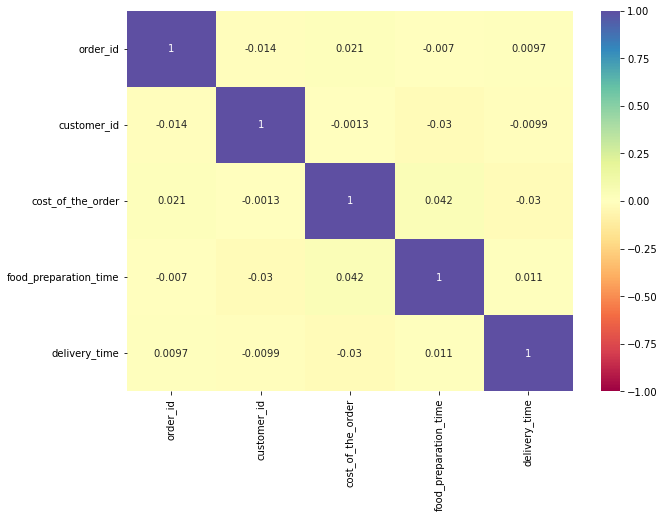

In [30]:
plt.figure(figsize=(10,7))
#print heatmap that shows correlation
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

##### Observations
* No variables show high correlation with other variables.

#### Cuisine type, cost of the order, and rating displayed

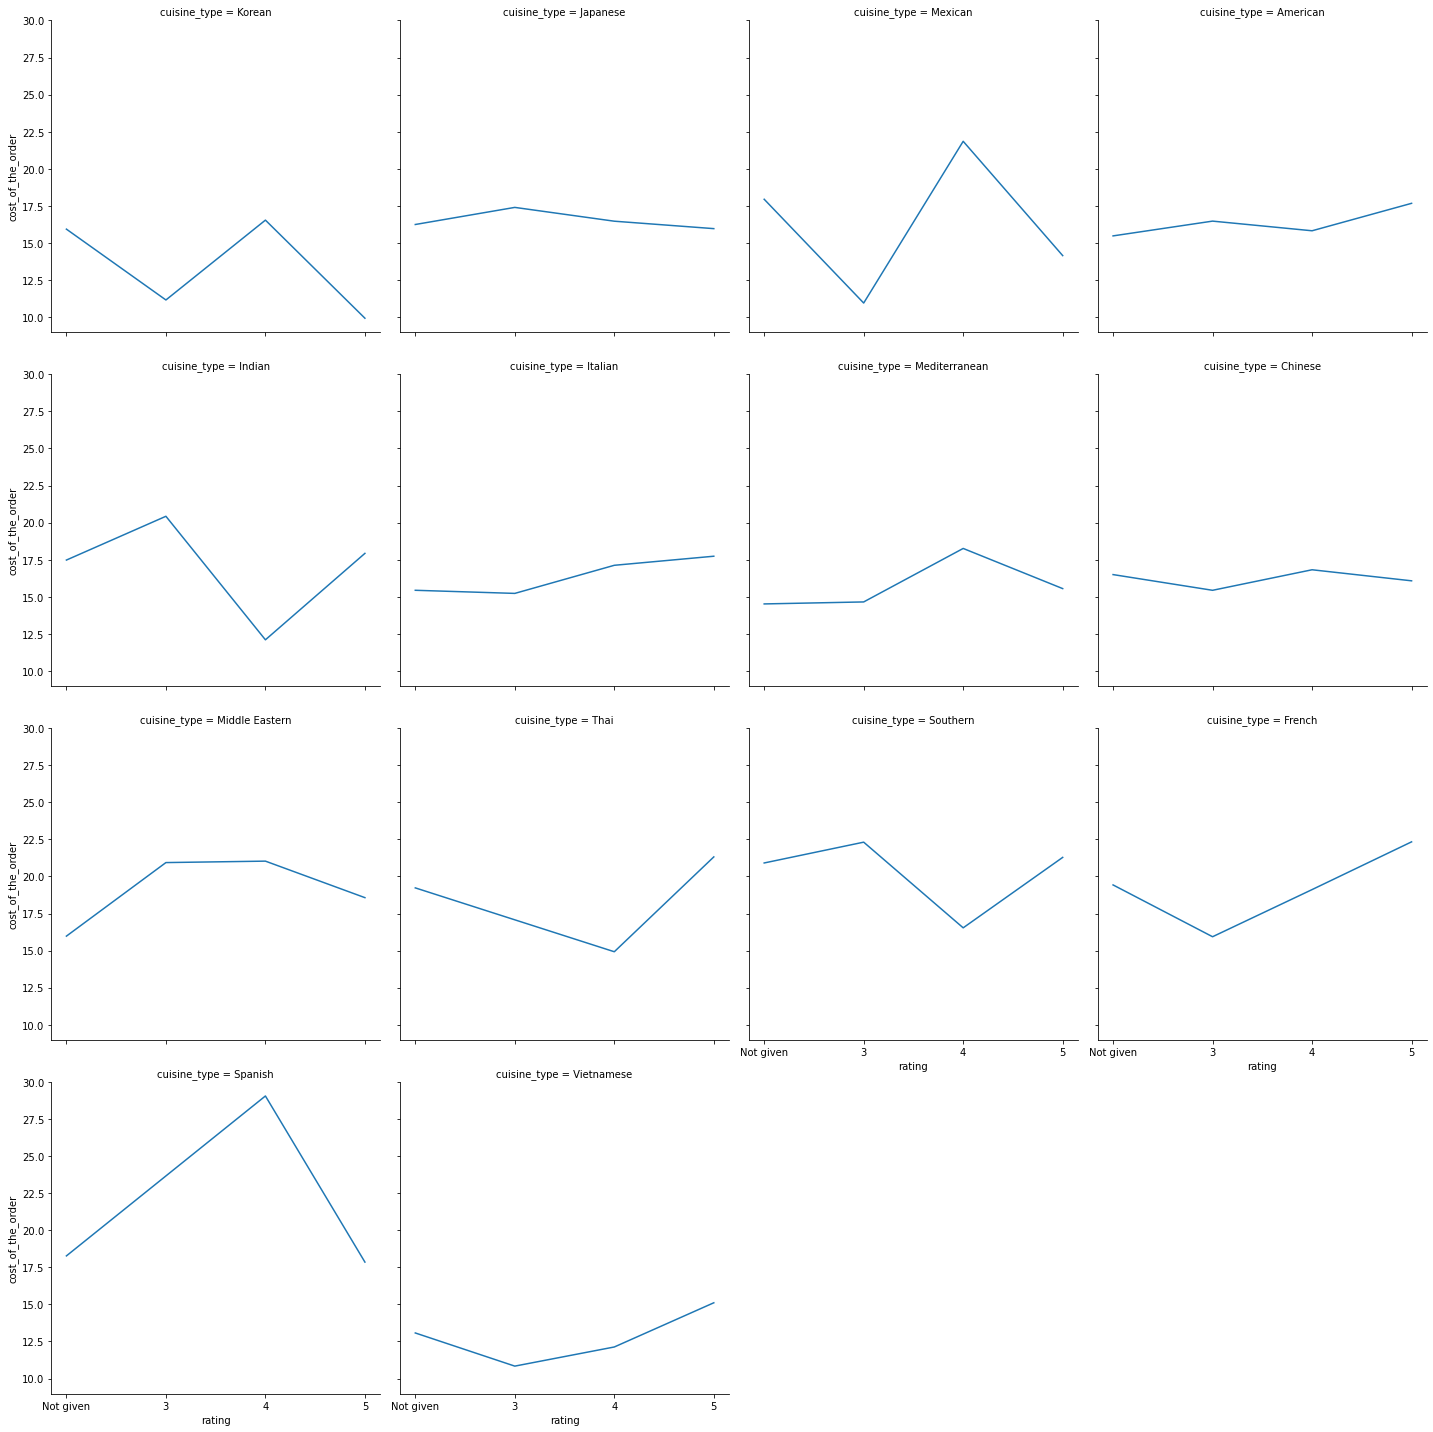

In [31]:
sns.relplot(data=data,x='rating',y='cost_of_the_order',col='cuisine_type',kind='line', ci=None, col_wrap=4)
plt.show()


The correlation is not strong, but it appears that if the cost of the order is lower, the rating tends to be higher. 

#### Cuisine type by cost of the order

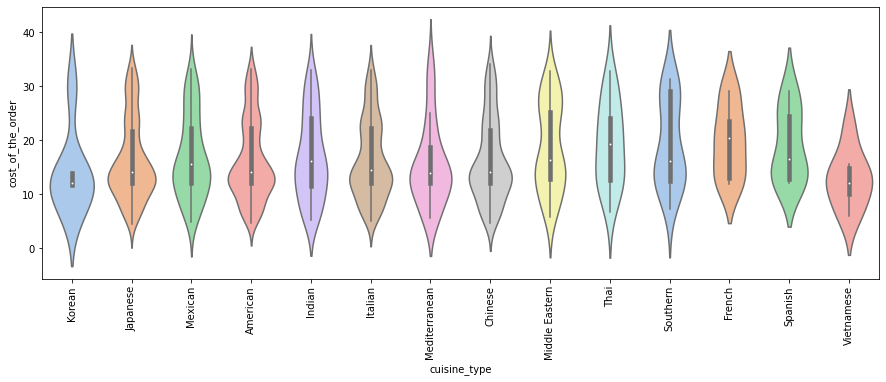

In [32]:
# delivery time by cost of the order
plt.figure(figsize=(15,5))
sns.violinplot(data=df,x='cuisine_type',y='cost_of_the_order',ci=None, palette='pastel')
plt.xticks(rotation=90) #rotates x axis labels
plt.show()

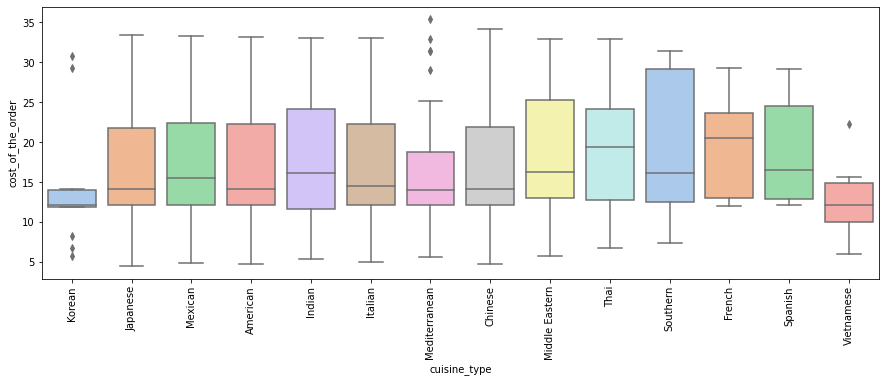

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order',palette='pastel');
plt.xticks(rotation=90) #rotates x axis labels
plt.show() #shows the graph without array from above code.

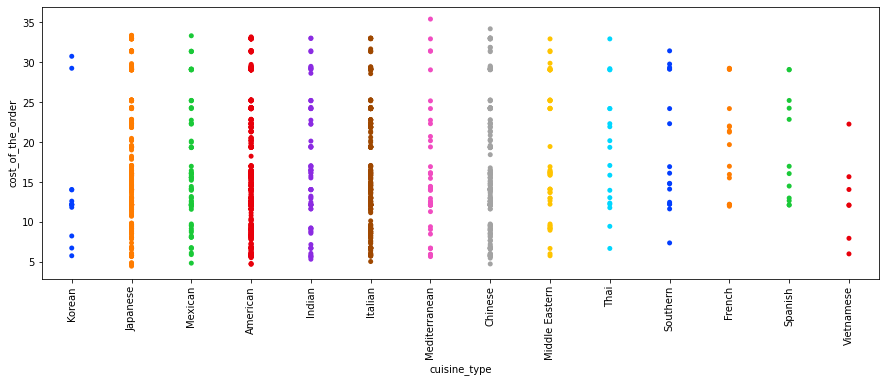

In [34]:
plt.figure(figsize = (15,5)) # To resize the plot

# Plot cuisine type by cost of the order
sns.stripplot(x="cuisine_type", y="cost_of_the_order", data=df, palette='bright',jitter=False) 
# jitter=False brings the output into a line, as opposed to spread out. 
plt.xticks(rotation=90);

##### Observations
* Korean cuisine has the lowest median food cost.
* Mediterranean food has the most outliers.
* American food appears to the be most popular cuisine, with the highest visual density in the strip plot. 

#### Cuisine type by delivery time

<Figure size 1440x432 with 0 Axes>

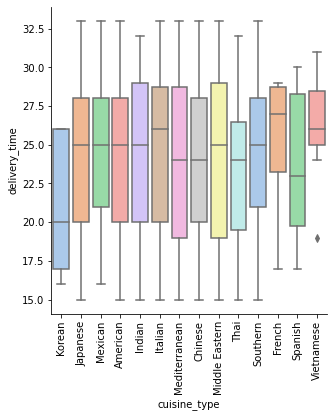

In [35]:
plt.figure(figsize=(20,6))
sns.catplot(data=df,x= 'cuisine_type', y='delivery_time', kind='box',palette='pastel')
plt.xticks(rotation=90);

##### Observations
* Korean cuisine has the lowest median delivery time at 20 minutes. 
* Japanese, Mexican, American, Indian, Middle Eastern, and Southern cuisines share the same median delivery time at 25 minutes. 
* French cuisine has the highest median delivery time at approximately 27 minutes. 

#### Food preparation time by weekday

<Figure size 1440x432 with 0 Axes>

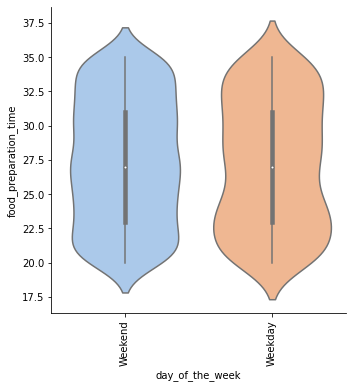

In [36]:
plt.figure(figsize=(20,6))
sns.catplot(data=df,x= 'day_of_the_week', y='food_preparation_time', kind='violin',palette='pastel')
plt.xticks(rotation=90);

##### Observations
* The median food preparation time by day of the week is the same regardless of weekday. 
* Weekdays appear to have several outliers that are slightly higher than weekends. 
* The data distribution seems to be normal. 

#### Food preparation time by cuisine type

<Figure size 1440x432 with 0 Axes>

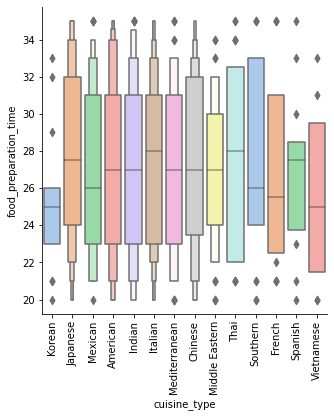

In [37]:
plt.figure(figsize=(20,6))
sns.catplot(data=df,x= 'cuisine_type', y='food_preparation_time', kind='boxen',palette='pastel')
plt.xticks(rotation=90);

##### Observations
* Vietnamese and Korean cuisines have similarly low median food preparation times at approximately 25 minutes. 
* Thai and Italian cuisines share high median food prep times at approximately 28 minutes. 

#### Total time by cuisine type

In [38]:
# the total time is food preparation time added to delivery time.
df['total_time'] = df['food_preparation_time'] + df['delivery_time'].copy()

<Figure size 1440x432 with 0 Axes>

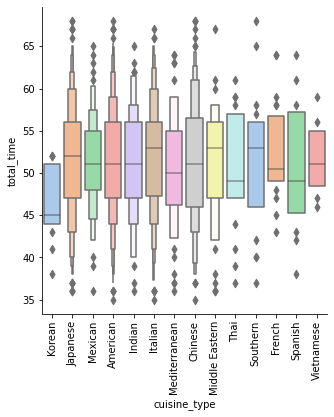

In [39]:
# plot total time by cuisine type
plt.figure(figsize=(20,6))
sns.catplot(data=df,x= 'cuisine_type', y='total_time', kind='boxen',palette='pastel')
plt.xticks(rotation=90);

##### Observations
* There are many outliers in the data set. 
* Korean cuisine has the lowest median total time.
* Chinese cuisine appears to have the most outliers. 

#### Total time by weekday

<Figure size 1440x432 with 0 Axes>

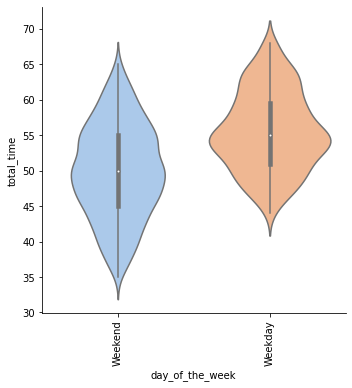

In [40]:
plt.figure(figsize=(20,6))
sns.catplot(data=df,x= 'day_of_the_week', y='total_time', kind='violin',palette='pastel')
plt.xticks(rotation=90);

##### Observations
* Data is distributed normally. 
* Weekends have lower total time on average. 
* The median total time on weekends is approximately 50 minutes. 
* The median total time on weekdays is approximately 55 minutes. 

#### Rating and cost of the order

<AxesSubplot:xlabel='rating', ylabel='cost_of_the_order'>

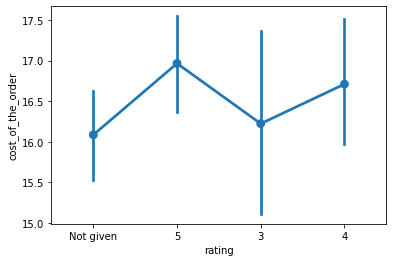

In [41]:
sns.pointplot(data=df, x='rating', y='cost_of_the_order')

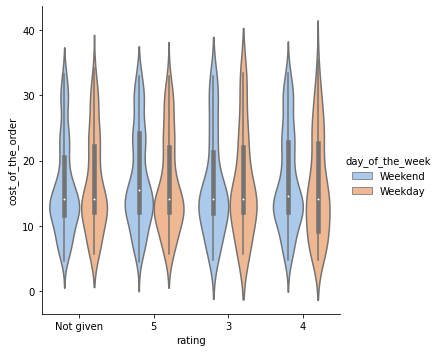

In [42]:
sns.catplot(data=df, x='rating', y='cost_of_the_order',kind='violin',hue='day_of_the_week',palette='pastel')

##### Observations
* Orders are rated higher on weekends than weekdays. 
* The cost of the order has a neglible effect on the rating given. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [43]:
#replacing Not given with nan 
df['rating']=df['rating'].replace(['Not given'],np.nan)

#changing the data type to float
df['rating']=df['rating'].astype(float)

In [44]:
df['rating'].apply(type).value_counts()

<class 'float'>    1898
Name: rating, dtype: int64

In [45]:
number_of_restaurants = df.groupby(['restaurant_name'])['rating'].count().reset_index()
number_of_restaurants

over_50_ratings = number_of_restaurants[number_of_restaurants['rating']>50]['restaurant_name']
over_50_ratings

20     Blue Ribbon Fried Chicken
21             Blue Ribbon Sushi
136                  Shake Shack
153            The Meatball Shop
Name: restaurant_name, dtype: object

In [46]:
# find the mean rating of the restaurant
restaurant_average_rating = number_of_restaurants.groupby(['restaurant_name'])['rating'].mean().reset_index()

# return restaurants with average rating over 4
rest_aver_rating_over_4 = restaurant_average_rating[restaurant_average_rating['rating']>4]

In [47]:
rest_aver_rating_over_4[rest_aver_rating_over_4['restaurant_name'].isin(over_50_ratings)].sort_values(by='rating', ascending = False).reset_index()

,index,restaurant_name,rating
0,136,Shake Shack,133.0
1,153,The Meatball Shop,84.0
2,21,Blue Ribbon Sushi,73.0
3,20,Blue Ribbon Fried Chicken,64.0


#### Observations:

* The following restaurants meet the criteria for the promotion: 

* Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [48]:
# Write the code here
# define the if-elif statement 
def compute (x):
    if x>20: # if x is greater than 20, it will be multipled by .25 to compute 25%
        return x *0.25 
    elif x > 5:
        return x * 0.15 # if orders cost more than 5 but less than 20, they will be multiplied by 15%
    else:
        return x * 0 # orders that don't meet the criteria are left out
df['earnings']= df['cost_of_the_order'].apply(compute) # apply the cost of the order to the if-elif statement
net_revenue = round(df['earnings'].sum(),2) # add together and round to 2 decimal places. 

#print the answer
print('The net revenue generated by the company is','$',net_revenue)
    

The net revenue generated by the company is $ 6166.3


#### Observations:
* The net revenue generated by the company is $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [49]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time'].copy() # compute total time

deliver_over_hour=df.loc[(df['total_time']>60)]['total_time'] # total time over 60

total_order_percentage = round(deliver_over_hour.count() / 1898 * 100,2) # find the percentage of orders that meet the criteria

print("The total number of orders that take more than 60 minutes to be delivered is", total_order_percentage, '%')

The total number of orders that take more than 60 minutes to be delivered is 10.54 %


#### Observations:
* 10.54% of orders take longer than 60 minutes to be delivered from the time the order is placed. 


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [50]:
# Write the code here

#mean delivery on weekdays

delivery_time_weekday= round(df[df['day_of_the_week']=='Weekday']['delivery_time'].mean(),2)
print('The average delivery time on weekdays is', delivery_time_weekday,'minutes.')

# mean delivery on weekends
delivery_time_weekend= round(df[df['day_of_the_week']=='Weekend']['delivery_time'].mean(),2)
print('The average delivery time on weekends is', delivery_time_weekend,'minutes.')


The average delivery time on weekdays is 28.34 minutes.
The average delivery time on weekends is 22.47 minutes.


#### Observations:
* The average delivery time on weekdays is 28.34 minutes.
* The average delivery time on weekends is 22.47 minutes. 
* There is a 5.87 minute difference between weekdays and weekends. 


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The 5 most popular restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. 
* The top cuisines are American, Japanese, Italian, Chinese, and Mexican cuisine.
* The cuisines with the highest median price are French followed by Thai cuisine. 
* A vast majority of orders are placed on the weekends. 
* On average, orders are delivered more quickly on the weekends. 
* Korean cuisine has the fastest total time on order preparation and delivery. 
* American and Japanese cuisines bring in the highest percentage of revenue. 

### Recommendations:

*  Incentivize customers to return to the application by giving a 15% discount on every 10th order. 
    * This would benefit the company by encouraging customers to order more often, creating more revenue.
* Motivate customers to encourage their friends and family to use the app by giving a 5 dollar sign on bonus for each successful reference.
    * This would increase the number of customers using the service. 
* Make weekdays more attractive for orders by reducing the cost to deliver, or discounting the total price by 5%.
    * Making weekdays more attractive would increase the number of orders made during the week, and could eventually lead to more reveneue and orders overall. 
* Encourage customers to rate restaurants by applying a discount to those customers who order and rate restaurants frequently. 
    * This would in turn increase the number of data collected on ratings, as nearly 39% of customers did not rate their order.  
* Investigate why customers are less likely to place orders on weekdays, and solve the issue of longer delivery times on weekdays. The increased delivery time could be attributed to increased traffic during rush hour. 
    * Customer satisfaction might increase due to lower wait times. 
* One way to solve the issue of long delivery times on weekdays is to incentivize orders made off peak hours. Those who order outside of peak hours could recieve a discount on their next order. 
    * This would reduce wait times and increase customer satisfaction. 
* 10.54% of orders take longer than 60 minutes to be delivered. Find a way to solve the long delivery time by inventivizing customers to order off peak hours. 
    * Motivate restaurants to reduce order preparation time by offering a bonus to the restaurant with the lowest order preparation time each quarter. 